## 📘 Step 1: Importing Libraries

Before we begin exploring or building models, let's bring in all the tools we’ll need. From handling data to drawing insightful visuals and training our machine learning model — this step sets up everything!

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Warnings
import warnings
warnings.filterwarnings('ignore')


## 📥 Step 2: Load Training and Testing Data


Let’s load the dataset files into Pandas DataFrames. Since we already have separate files for training and testing, we won’t split anything manually.

In [43]:

# Load the training dataset
df = pd.read_csv("/content/drive/MyDrive/Loan prediction/train_u6lujuX_CVtuZ9i.csv")

# View the first few rows
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 🧹 Step 3: Data Cleaning & Preprocessing

Now we’ll clean the data:

-Handle missing values

_Encode categorical variables

_Ensure numerical formats are correct

In [44]:
# Drop Loan_ID
df.drop("Loan_ID", axis=1, inplace=True)

# Encode target: 'Y' -> 1, 'N' -> 0
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

# Fill missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

# Encode categorical columns
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


## 📊 Step 4: Exploratory Data Analysis (EDA)

Let’s uncover patterns and relationships. This step makes the data come alive.

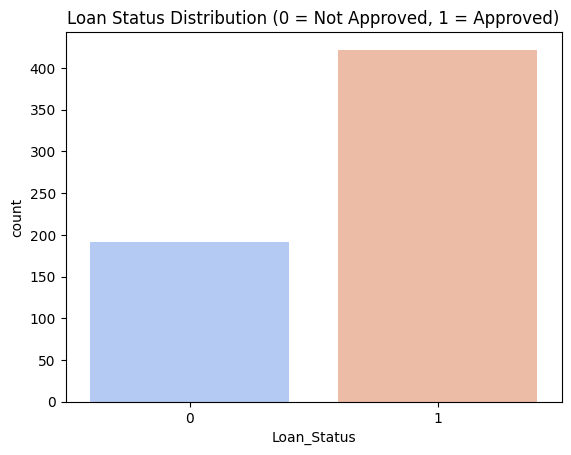

In [56]:
# Class Distribution
sns.countplot(x='Loan_Status', data=df, palette='coolwarm')
plt.title("Loan Status Distribution (0 = Not Approved, 1 = Approved)")
plt.show()


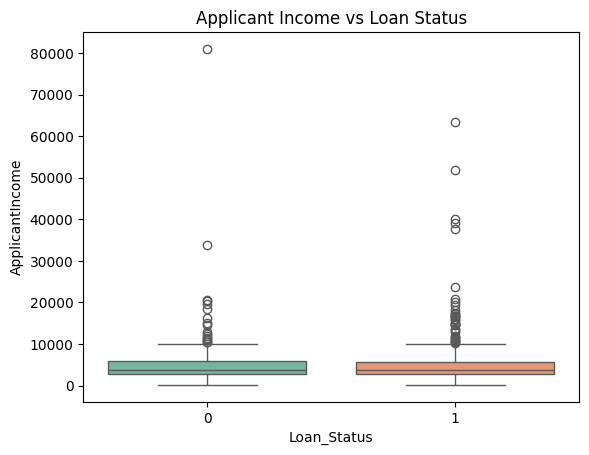

In [58]:
#  Income vs Loan Status
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df, palette='Set2')
plt.title("Applicant Income vs Loan Status")
plt.show()


In [45]:
# Income vs. LoanAmount (colored by Loan Status)
px.scatter(df, x='ApplicantIncome', y='LoanAmount',
           color=df['Loan_Status'].map({1: 'Approved', 0: 'Rejected'}),
           title="Applicant Income vs Loan Amount")

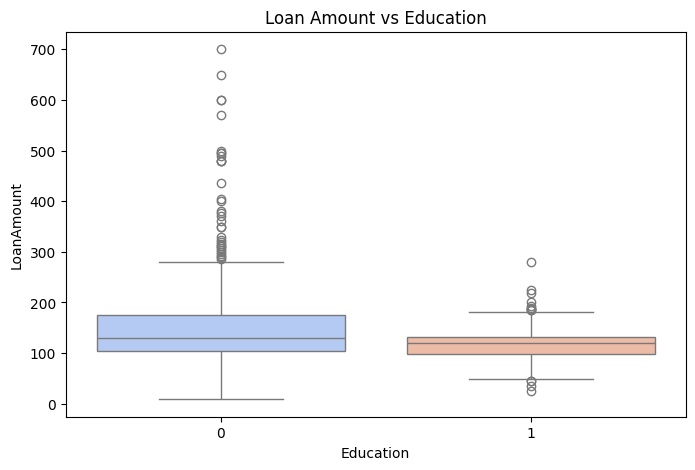

In [59]:
# Boxplot by Education
plt.figure(figsize=(8, 5))
sns.boxplot(x='Education', y='LoanAmount', data=df, palette='coolwarm')
plt.title("Loan Amount vs Education")
plt.show()

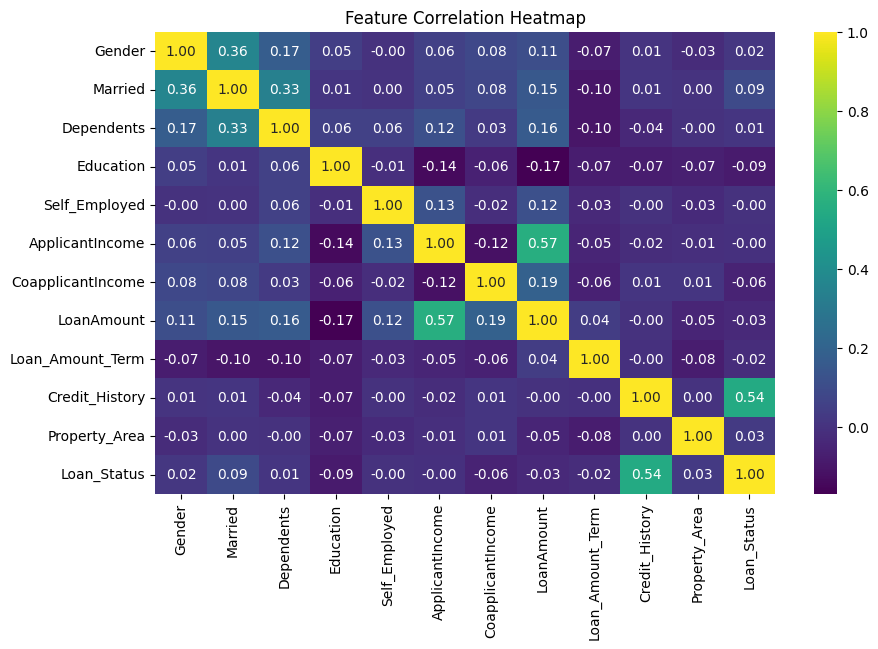

In [57]:
# Heatmap for correlation
# Drop non-numeric columns before computing correlation
numeric_df = df.select_dtypes(include=[np.number])  # only keep numeric columns

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


## 🏗️ Step 5: Model Training with Decision Tree

Time to train! We’ll fit a Decision Tree classifier — an intuitive yet powerful model — to predict loan approval.

In [49]:
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]


In [50]:
model = DecisionTreeClassifier(random_state=42, max_depth=4)
model.fit(X, y)


DecisionTreeClassifier(max_depth=4, random_state=42)

## ✅ Step 6: Evaluation

Let’s measure how well our model performs using metrics that matter — precision, recall, F1-score, and accuracy.

In [51]:
# Predictions
y_pred = model.predict(X)

# Accuracy
acc = accuracy_score(y, y_pred)
print(f"✅ Accuracy Score: {acc:.4f}")

# Classification Report
print("\n📄 Classification Report:\n", classification_report(y, y_pred))


✅ Accuracy Score: 0.8225

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.48      0.63       192
           1       0.81      0.98      0.88       422

    accuracy                           0.82       614
   macro avg       0.85      0.73      0.76       614
weighted avg       0.84      0.82      0.80       614



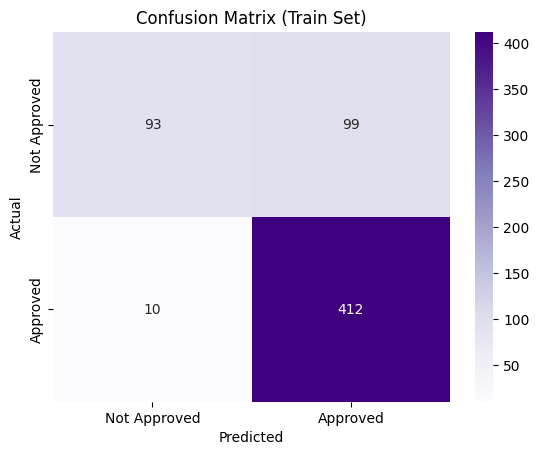

In [52]:
# Confusion Matrix
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Train Set)')
plt.show()

## 🌳 Step 7: Visualize the Decision Tree

Here’s the real magic! A visualization of how the decision tree makes its choices — a great addition to my project visuals.

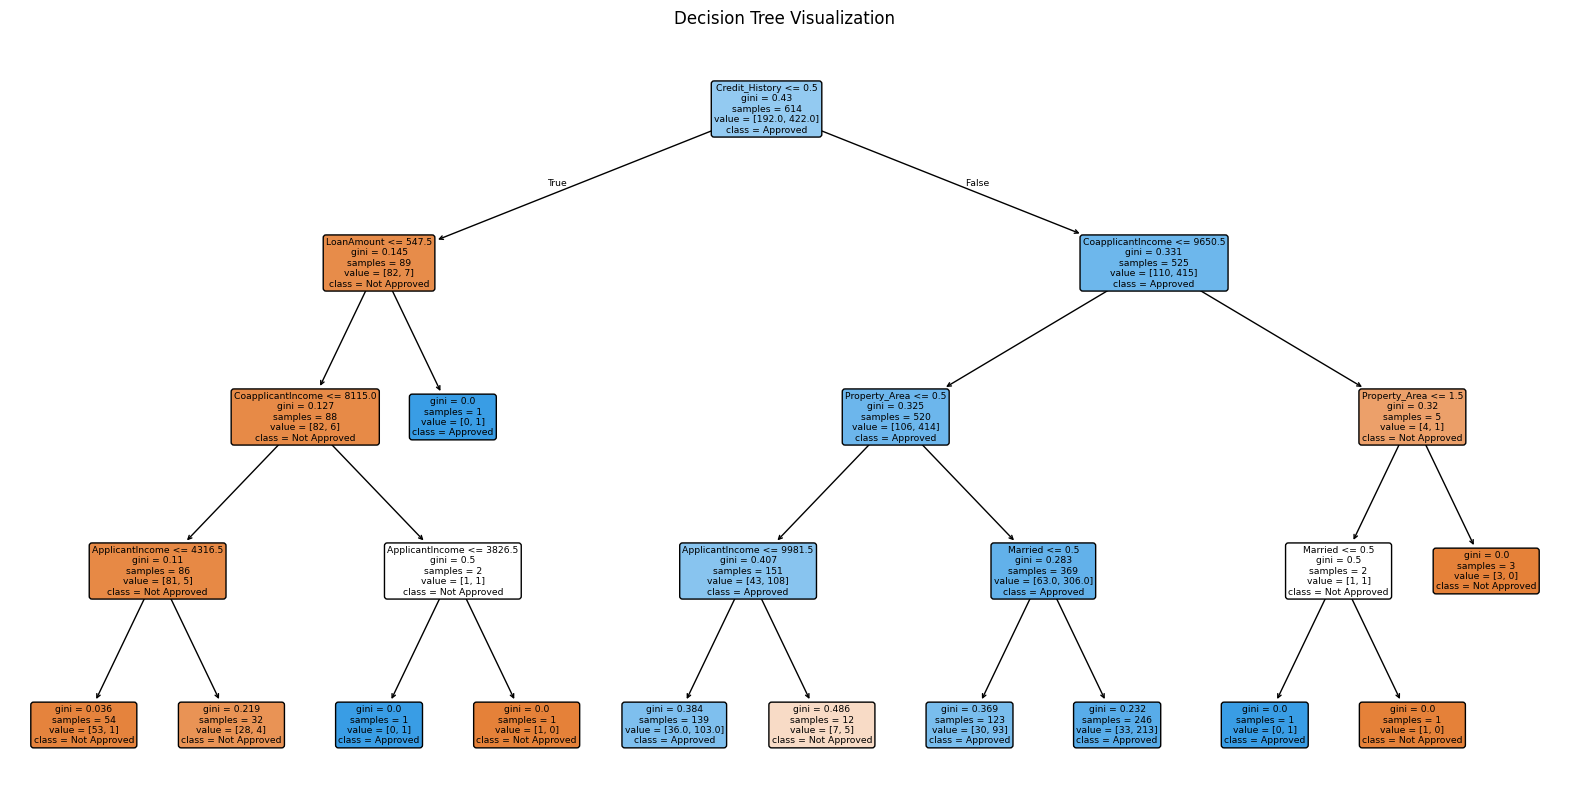

In [53]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['Not Approved', 'Approved'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


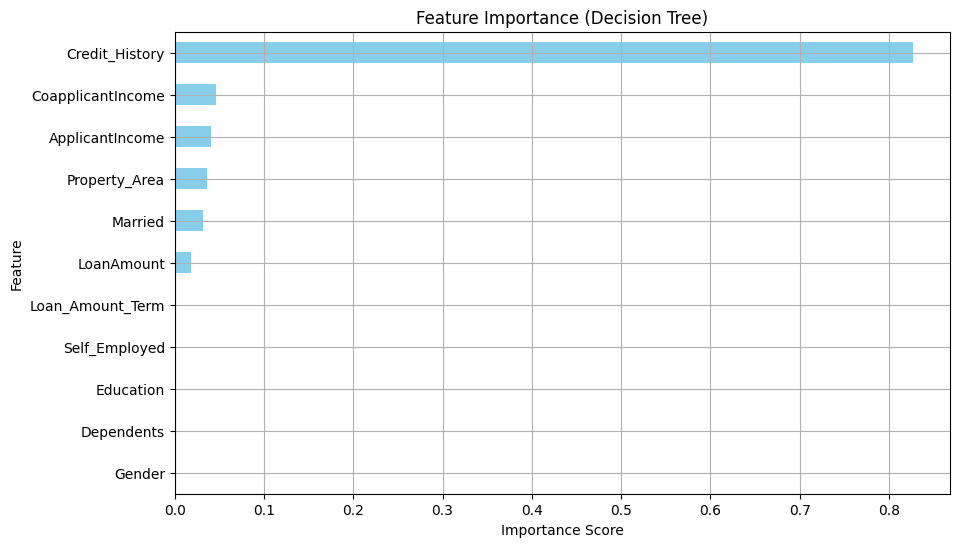

In [54]:
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp = feat_imp.sort_values(ascending=True)

plt.figure(figsize=(10,6))
feat_imp.plot(kind='barh', color='skyblue')
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(True)
plt.show()


## 💾 Step 8: Save the Model

Let's save this model for later use.

In [55]:
import joblib
joblib.dump(model, 'loan_prediction_dt_model.pkl')


['loan_prediction_dt_model.pkl']